<a href="https://colab.research.google.com/github/Rauloigs/Fin-Technical-Analysis/blob/main/cppi_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install the widgets!
%pip install -q ipywidgets
from IPython.display import display
import ipywidgets as widgets
from IPython.display import clear_output

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

# To upload files from drive
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# additional for gspread
import gspread
from google.auth import default


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# additional for gspread 1
creds, _ = default()
gc = gspread.authorize(creds)

# print csv in df
link_returns = 'https://drive.google.com/file/d/1dj1A6Cjvs6m3p_ldsAc78k14iFT0faBR/view?usp=sharing'
link_size = 'https://drive.google.com/file/d/16npKY1ZL3XRg3dJeqQErBNTCubytx_Et/view?usp=sharing'
link_nfirms = 'https://drive.google.com/file/d/1Xw-ND4BaDdmSY-byb4AAUrdOn9_J-H5q/view?usp=sharing'


# to get the id part of the file
id_returns = link_returns.split("/")[-2]
id_size = link_size.split("/")[-2]
id_nfirms = link_nfirms.split("/")[-2]

# Download returns file
downloaded = drive.CreateFile({'id':id_returns})
downloaded.GetContentFile('ind30_m_vw_rets.csv')

# Download returns size
downloaded = drive.CreateFile({'id':id_size})
downloaded.GetContentFile('ind30_m_vw_size.csv')

# Download returns nfirms
downloaded = drive.CreateFile({'id':id_nfirms})
downloaded.GetContentFile('ind30_m_nfirms.csv')

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

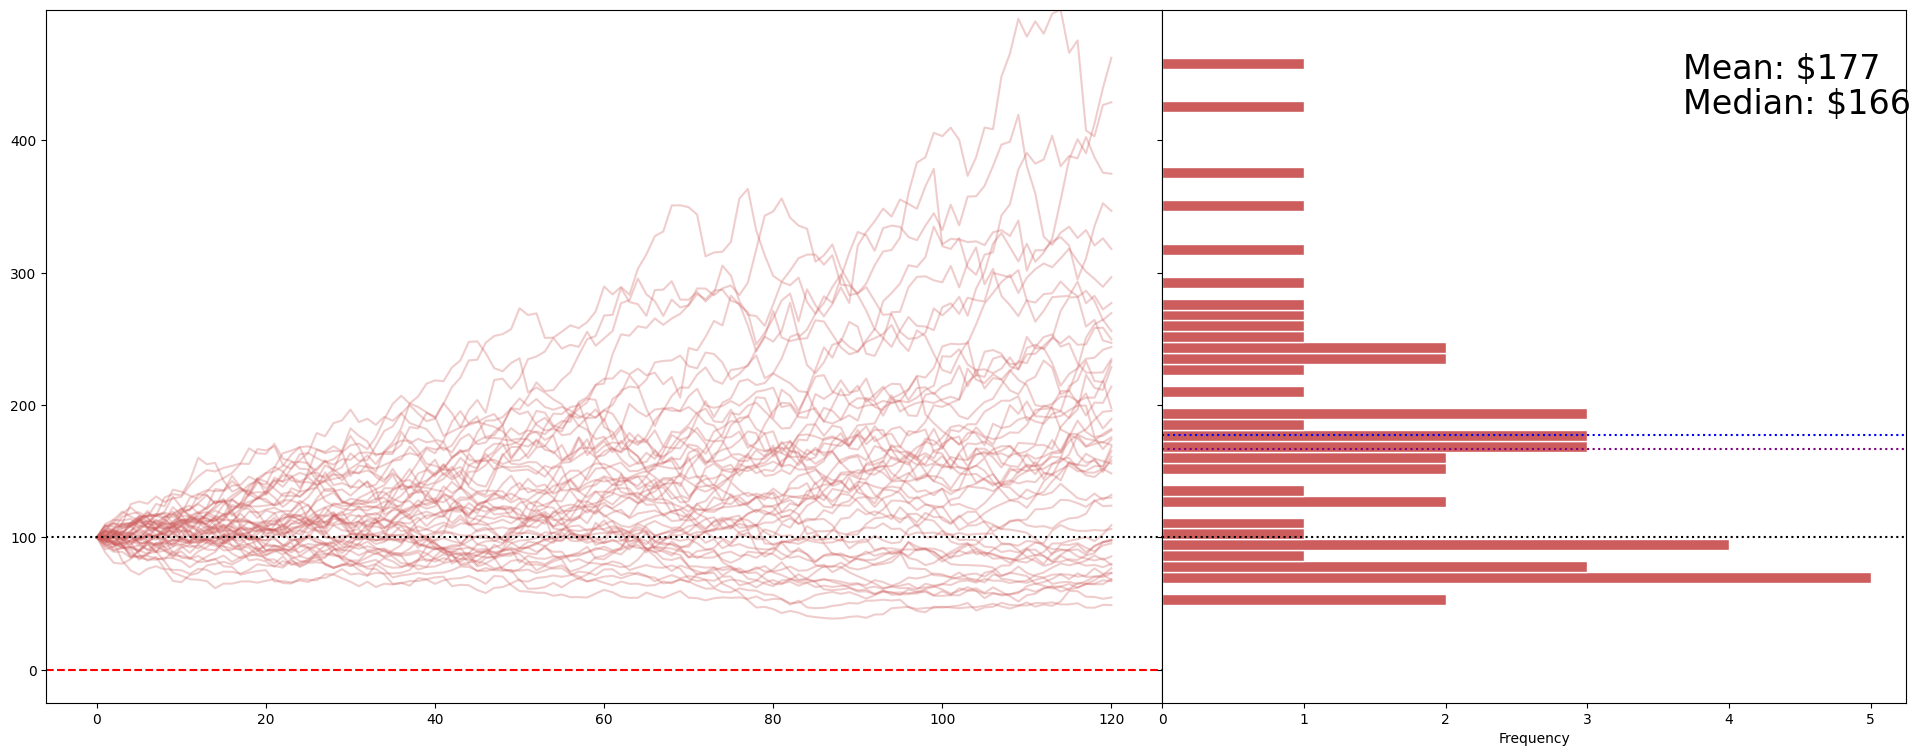

In [ ]:
%load_ext autoreload
%autoreload 2

# Matplot lib / not necessary here in colab
%matplotlib inline

# Remember: !cp -path /content
!cp /content/drive/MyDrive/rigs/courses/finance/modules/modules_py/edhec_risk_kit.py /content

import edhec_risk_kit as erk

In [ ]:
def squareit(n):
  return n*n

In [ ]:
squareit(5)

25

In [ ]:
widgets.interact(squareit, n=(0, 100))

interactive(children=(IntSlider(value=50, description='n'), Output()), _dom_classes=('widget-interact',))

<function __main__.squareit(n)>

# GBM Interactive Plots

<Axes: >

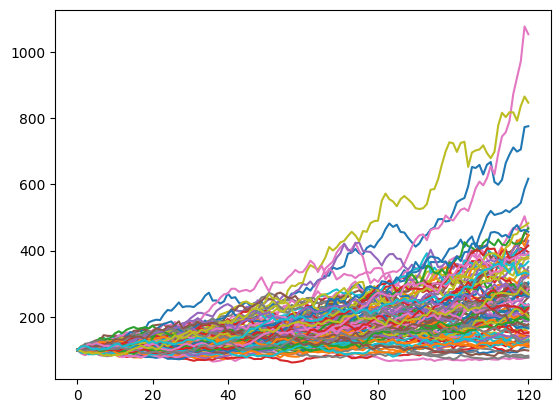

In [ ]:
erk.gbm(10, 100, mu=0.1).plot(legend=False)

In [ ]:
def show_gbm(n_scenarios, mu, sigma):
  '''
  Draw the results of a stock price evolution under a Geometric Brownian Motion model
  '''
  clear_output()
  s_0=100
  prices = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, s_0=s_0)
  ax = prices.plot(legend=False, color='indianred', alpha= 0.5, linewidth=2, figsize=(12, 5))
  ax.axhline(y=s_0, ls=':', color='black')
  ax.set_ylim(top=400)
  # draw a dot at the origin
  ax.plot(0,s_0, marker='o', color='darkred', alpha=0.2)

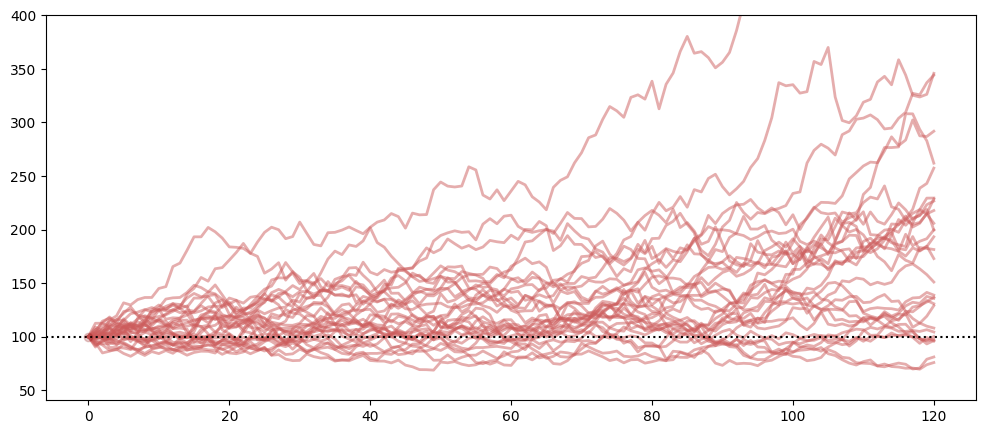

In [ ]:
show_gbm(30, 0.07, 0.15)

In [ ]:
# Now the widgets! huju
gbm_controls = widgets.interactive(show_gbm,
                                   # Give the parameters for the controls
                                   # with minimum, mx, nsize
                                   n_scenarios=(1, 20, 1),
                                   mu = (-.2, 0.2, 0.01),
                                   sigma = (0, 0.3, 0.01)
                                   )
# out = widgets.Output(layout=widgets.Layout(height='20px'))

interactive(children=(IntSlider(value=10, description='n_scenarios', max=20, min=1), FloatSlider(value=0.0, de…

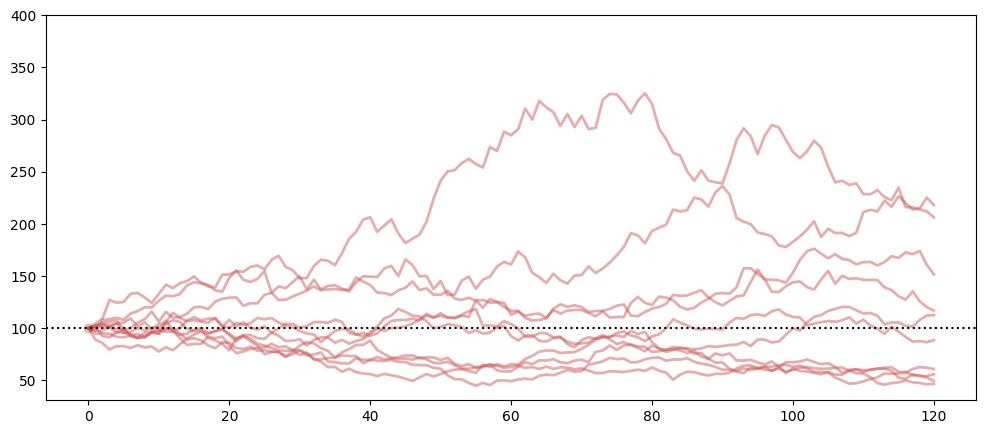

In [ ]:
# display controls
# Plots duplicate plots = shit !! -> trouble-shoot this
display(gbm_controls
        # clear_output(wait=True)
        #, out)
        )


# Interactive CPPI Simulation - Monte Carlo

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

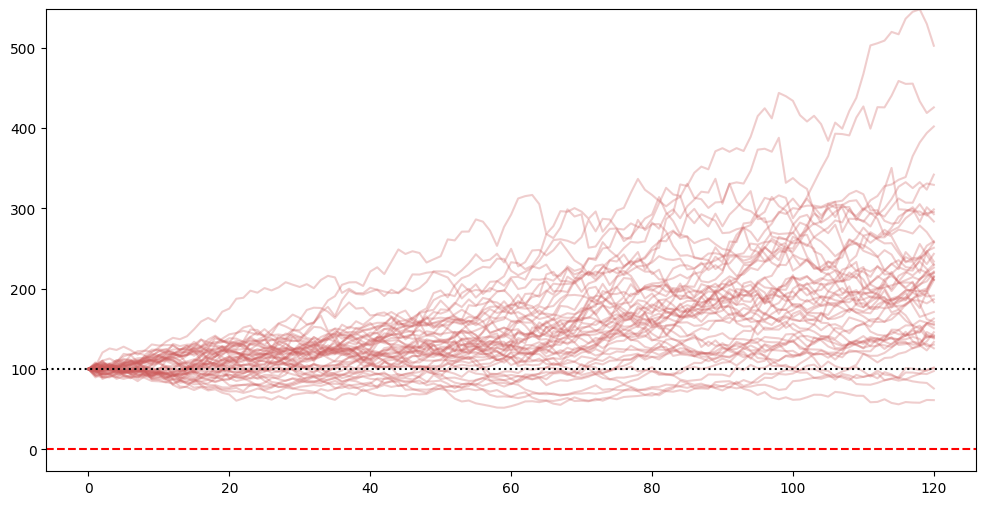

In [ ]:
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, y_max=100):
  '''
  Plot the results of a Monte Carlo Simulation of CPPI
  '''
  start=100
  # sim_rets = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, steps_per_year=12)
  sim_rets = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False, steps_per_year=12)
  risky_r = pd.DataFrame(sim_rets)
  # run the "back"-test
  btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r), riskfree_rate=riskfree_rate, m=m, start=start, floor=floor)
  wealth = btr['Wealth']
  y_max = wealth.values.max()*y_max/100
  ax = wealth.plot(legend=False, alpha= 0.3, color='indianred', figsize=(12, 6))
  ax.axhline(y=start, ls=':', color='black')
  ax.axhline(y=start*floor, ls='--', color='red')
  ax.set_ylim(top=y_max)

cppi_controls = widgets.interactive(show_cppi,
                                    n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50),
                                    mu=(0., +.2, .01),
                                    sigma=(0, .30, .05),
                                    floor=(0, 2, .1),
                                    m=(1, 5, .5),
                                    riskfree_rate=(0, .05, .01),
                                    y_max=widgets.IntSlider(min=0, max=100, step=1, value=100,
                                                            description='Zoom Y Axis')
                                    )
display(cppi_controls)

In [ ]:
import matplotlib.pyplot as plt

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

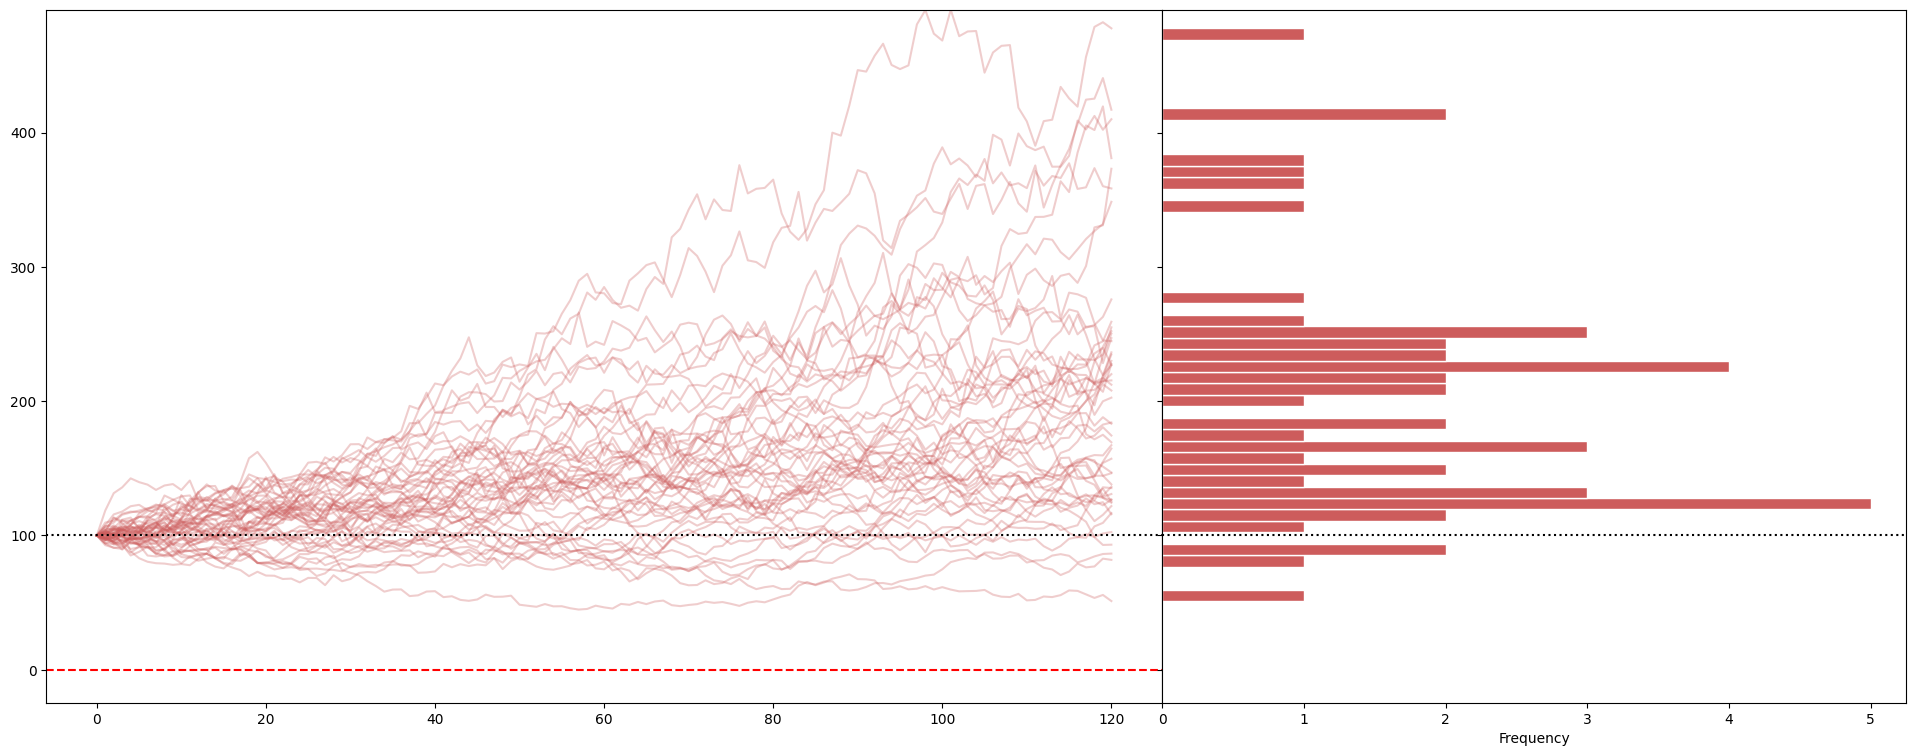

In [ ]:
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, y_max=100):
  '''
  Plot the results of a Monte Carlo Simulation of CPPI
  '''
  start=100
  sim_rets = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False, steps_per_year=12)
  risky_r = pd.DataFrame(sim_rets)
  # run the "back"-test
  btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r), riskfree_rate=riskfree_rate, m=m, start=start, floor=floor)
  wealth = btr['Wealth']
  # calculate terminal wealth stats
  y_max = wealth.values.max()*y_max/100
  terminal_wealth = wealth.iloc[-1]
  # Plot!
  fig, (wealth_ax, hist_ax) = plt.subplots(nrows=1, ncols=2, sharey=True, gridspec_kw={'width_ratios':[3,2]}, figsize=(24,9))
  plt.subplots_adjust(wspace=0.0)

  wealth.plot(ax=wealth_ax, legend=False, alpha= 0.3, color='indianred')
  wealth_ax.axhline(y=start, ls=':', color='black')
  wealth_ax.axhline(y=start*floor, ls='--', color='red')
  wealth_ax.set_ylim(top=y_max)

  terminal_wealth.plot.hist(ax=hist_ax, bins=50, ec='w', fc='indianred', orientation='horizontal')
  hist_ax.axhline(y=start, ls=':', color='black')

cppi_controls = widgets.interactive(show_cppi,
                                    n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50),
                                    mu=(0., +.2, .01),
                                    sigma=(0, .30, .05),
                                    floor=(0, 2, .1),
                                    m=(1, 5, .5),
                                    riskfree_rate=(0, .05, .01),
                                    y_max=widgets.IntSlider(min=0, max=100, step=1, value=100,
                                                            description='Zoom Y Axis')
                                    )
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

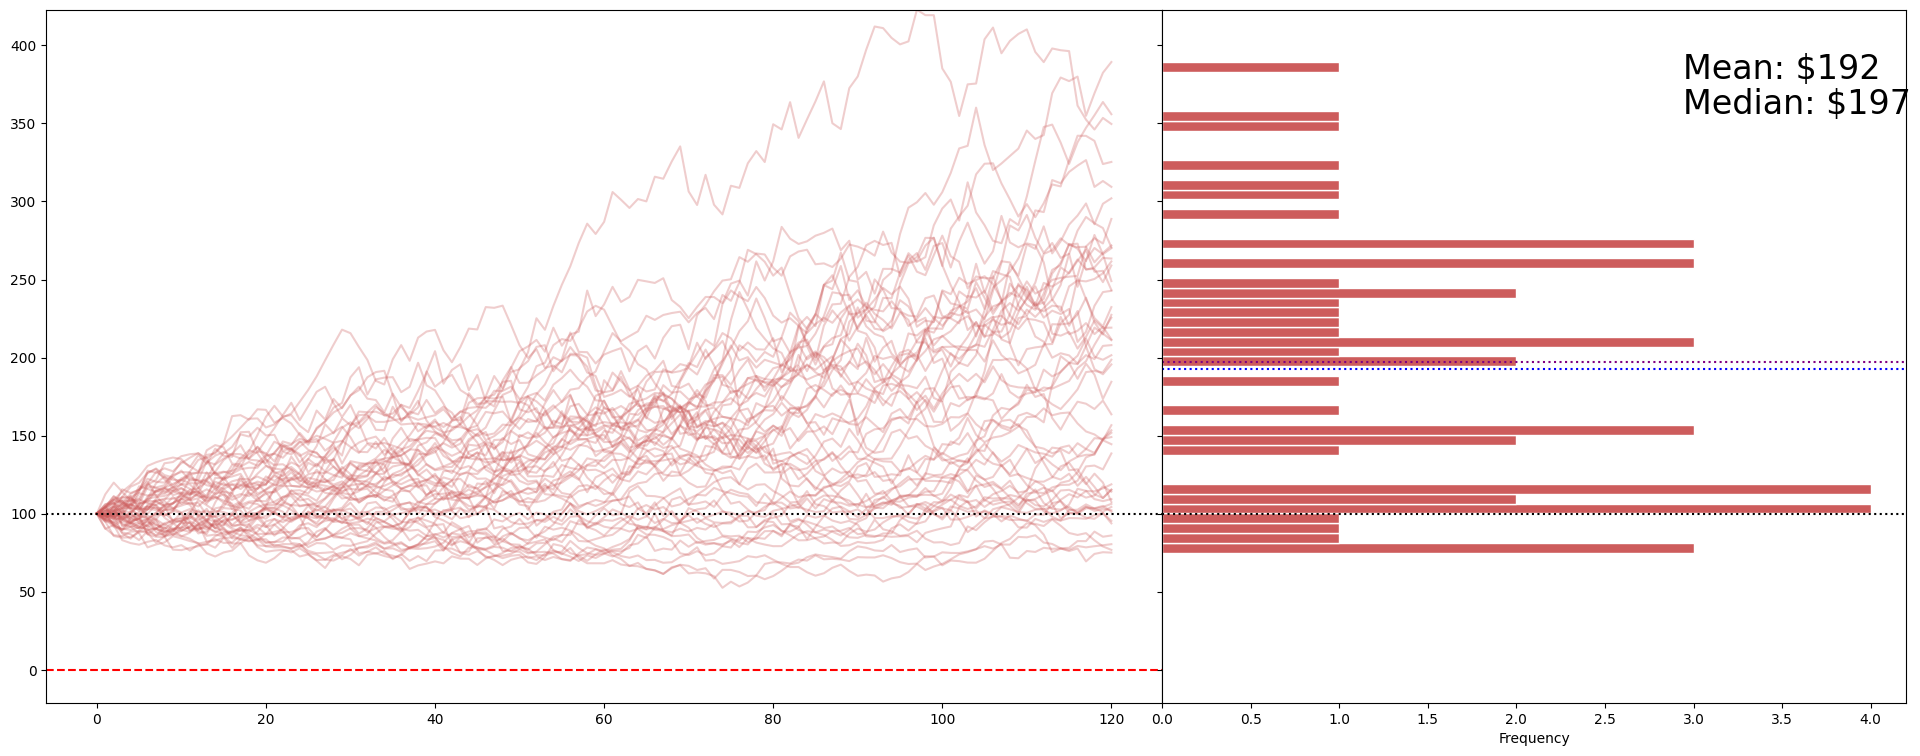

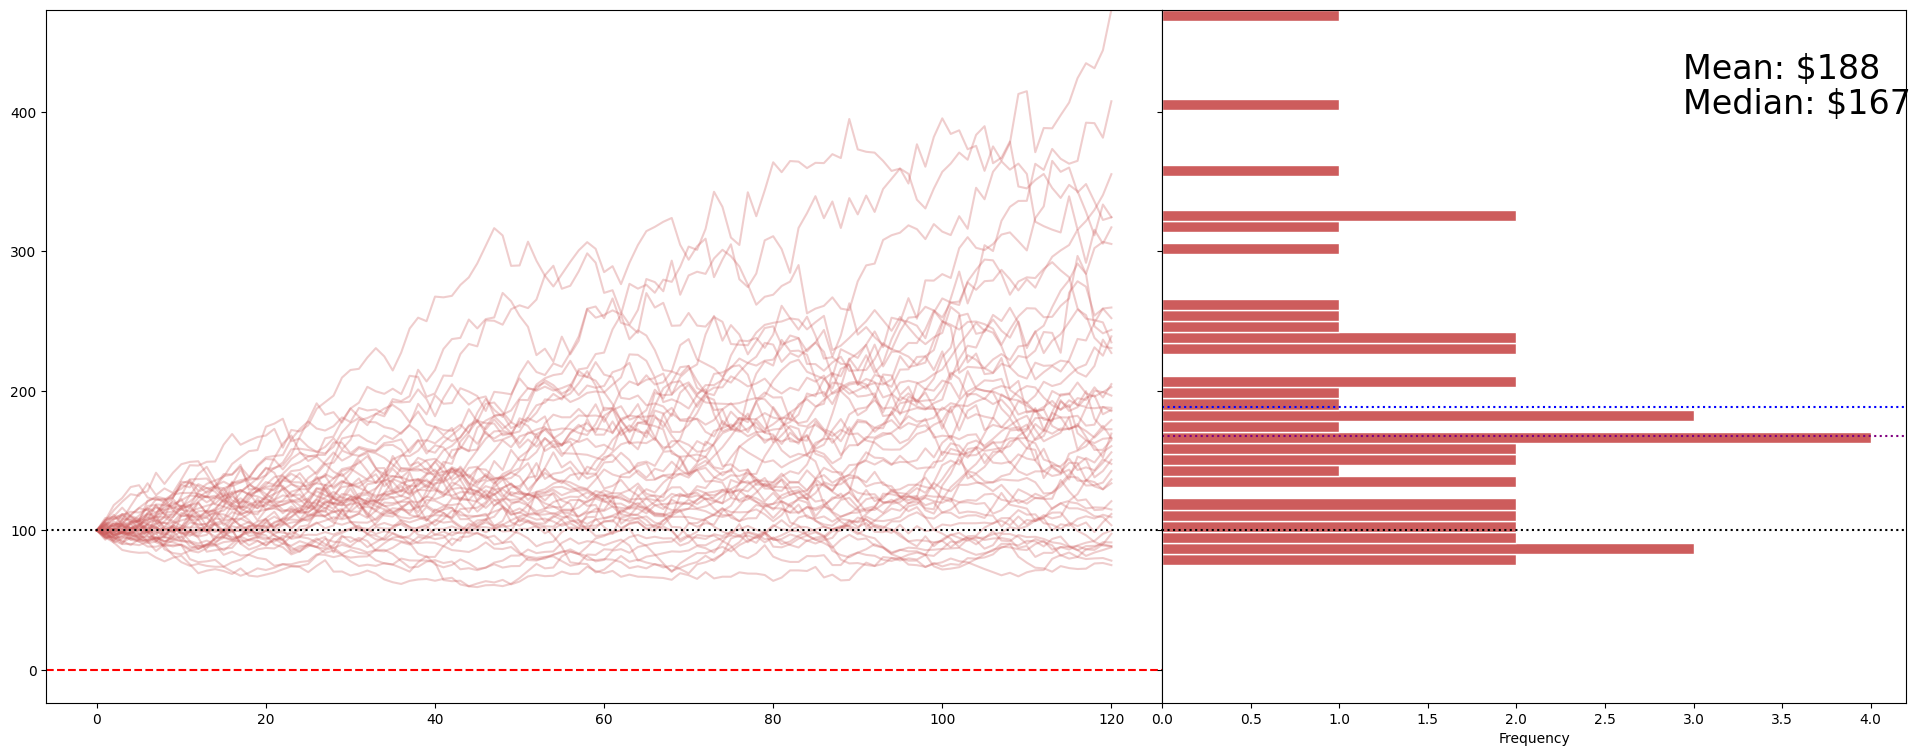

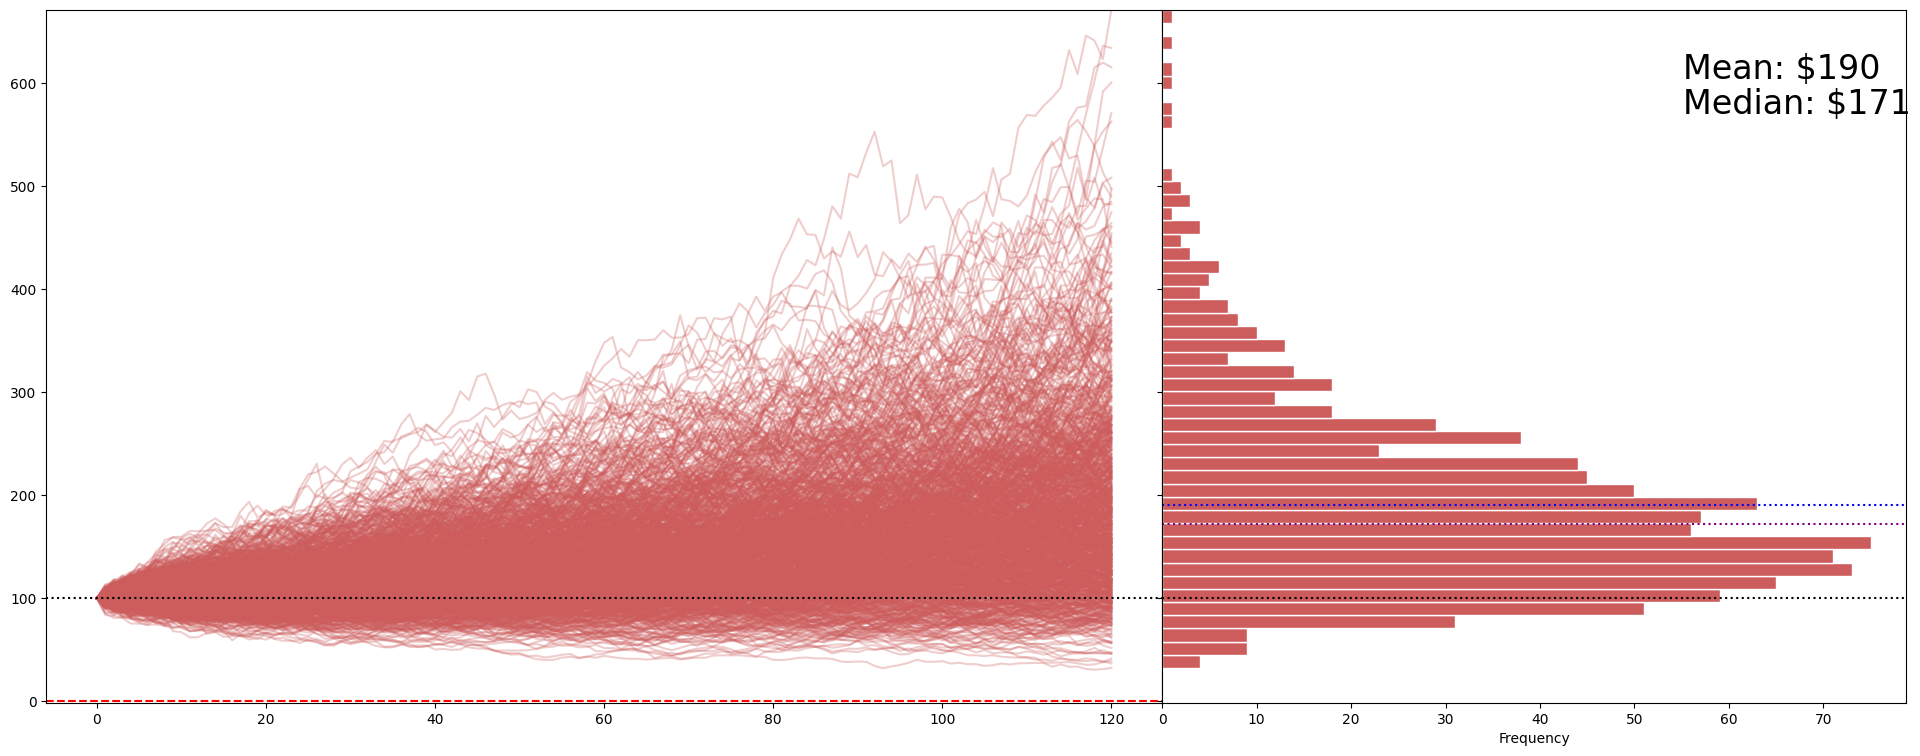

In [ ]:
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, steps_per_year=12, y_max=100):
  '''
  Plot the results of a Monte Carlo Simulation of CPPI
  '''
  start=100
  sim_rets = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False, steps_per_year=12)
  risky_r = pd.DataFrame(sim_rets)
  # run the "back"-test
  btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r), riskfree_rate=riskfree_rate, m=m, start=start, floor=floor)
  wealth = btr['Wealth']

  # calculate terminal wealth stats
  y_max = wealth.values.max()*y_max/100
  terminal_wealth = wealth.iloc[-1]

  tw_mean = terminal_wealth.mean()
  tw_median = terminal_wealth.median()
  failure_mask = np.less(terminal_wealth, start*floor)
  n_failures = failure_mask.sum()
  p_fail = n_failures/n_scenarios

  e_shortfall = np.dot(terminal_wealth-start*floor, failure_mask)/n_failures if n_failures > 0 else 0.0

  # Plot!
  fig, (wealth_ax, hist_ax) = plt.subplots(nrows=1, ncols=2, sharey=True, gridspec_kw={'width_ratios':[3,2]}, figsize=(24,9))
  plt.subplots_adjust(wspace=0.0)

  wealth.plot(ax=wealth_ax, legend=False, alpha= 0.3, color='indianred')
  wealth_ax.axhline(y=start, ls=':', color='black')
  wealth_ax.axhline(y=start*floor, ls='--', color='red')
  wealth_ax.set_ylim(top=y_max)

  terminal_wealth.plot.hist(ax=hist_ax, bins=50, ec='w', fc='indianred', orientation='horizontal')
  hist_ax.axhline(y=start, ls=':', color='black')
  hist_ax.axhline(y=tw_mean, ls=':', color='blue')
  hist_ax.axhline(y=tw_median, ls=':', color='purple')
  hist_ax.annotate(f'Mean: ${int(tw_mean)}', xy=(.7, .9), xycoords='axes fraction', fontsize=24)
  hist_ax.annotate(f'Median: ${int(tw_median)}', xy=(.7, .85), xycoords='axes fraction', fontsize=24)
  if (floor > 0.01):
    hist_ax.axhline(y=start*floor, ls='--', color='red', linewidth=3)
    hist_ax.annotate(f'Violations: {n_failures} ({p_fail*100:2.2f}%)\nE(shortfall)=${e_shortfall:2.2f}', xy=(.7, .7), xycoords='axes fraction', fontsize=24)

cppi_controls = widgets.interactive(show_cppi,
                                    n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50),
                                    mu=(0., +.2, .01),
                                    sigma=(0, .5, .05),
                                    floor=(0, 2, .1),
                                    m=(1, 5, .5),
                                    riskfree_rate=(0, .05, .01),
                                    steps_per_year=widgets.IntSlider(min=1, max=12, step=1, value=12,
                                                                     description='Rebals/Year'),
                                    y_max=widgets.IntSlider(min=0, max=100, step=1, value=100,
                                                            description='Zoom Y Axis')
                                    )
display(cppi_controls)

In [ ]:
# erk.show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, steps_per_year=12, y_max=100)

In [ ]:
# display(cppi_controls)